# Import Library yang dibutuhkan

In [1]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import collections
from numpy import savetxt
from scipy.stats import entropy
from math import log, e
import os, sys
from scipy.signal import butter, iirnotch, lfilter
from scipy.stats import norm, kurtosis
from scipy.stats import skew    
import neurokit2 as nk
from scipy.signal import find_peaks


C:\Users\helmi.ruslan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\helmi.ruslan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar'

In [2]:
def find_signal_peaks(arraynya, minimum=0, maximum=None, freq=500):
    dist = freq/2
    r_peaks = find_peaks(arraynya,distance=dist,prominence=(minimum,maximum))
    return r_peaks[0].tolist()

def get_rr(r_peaks, to_sec=False,sample_rate=125):
    rr_list = []
    start_stop = []
    for i in range(len(r_peaks)-2):
        rr_list.append(r_peaks[i+1]-r_peaks[i])
        start_stop.append([r_peaks[i],r_peaks[i+1]])
    if (to_sec):
        rr_list = np.divide(rr_list,sample_rate)
    return rr_list, start_stop

# Baca dataset, denoising, ekstraksi ciri

In [3]:
J=0 # jumlah file
directory_path = 'dataset/sehat'
for iter in range(0,2):
    for x in os.listdir(directory_path):
        if not x.lower().endswith('.csv'):
            continue
        J=J+1
    directory_path = 'dataset/pasien'
n = J #jumlah file
m = 5
FEAT = [] #bakal jadi Feature.csv
for i in range(n): 
    FEAT.append([0] * m) #mengisi dengan angka 0 semua 
directory_path = 'dataset/sehat'
J=-1
K=0
FEAT
for iter in range(0,2):
    for x in os.listdir(directory_path):
        if not x.lower().endswith('.csv'):
            continue
        full_file_path = directory_path  +   '/'   + x
        J=J+1
        print ('Using file', full_file_path)
        try:
            dataraw = pd.read_csv(full_file_path,index_col='Timestamp', parse_dates=['Timestamp'])
            dataset = pd.DataFrame(dataraw['Value']) #ambil kolom value dari setiap file
        except:
            dataraw = pd.read_csv(full_file_path,index_col='timestamp', parse_dates=['timestamp'])
            dataset = pd.DataFrame(dataraw['values'])
        x1=np.array(dataset)  #ubah jadi array, namanya x1
        Dat=[]
        Dat=[0 for i in range(x1.size)] #bikin array kosong isinya 0 semua sepajang array x1
        for i in range(0,x1.size-1):
            Dat[i]=max(x1[i]) #why pakai max?
        
        fs = 110
        cutoff_low = 3
        powerline=60

        # FIR Filter
        # The Nyquist rate of the signal.
        nyq_rate = fs / 2.0
        # The desired width of the transition from pass to stop,
        # relative to the Nyquist rate.  We'll design the filter
        # with a 5 Hz transition width.
        width = 5.0/nyq_rate
        # The desired attenuation in the stop band, in dB.
        # Compute the order and Kaiser parameter for the FIR filter.
        N, beta = kaiserord(powerline, width)
        # The cutoff frequency of the filter.
        cutoff_hz = cutoff_low
        # Use firwin with a Kaiser window to create a lowpass FIR filter.
        taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        # Use lfilter to filter x with the FIR filter.
        y_filtered = lfilter(taps, 1.0, Dat)
       
        # FEATURE EXTRACTION
        try:
            peaks = find_signal_peaks(y_filtered,minimum=0.2)
            rr, rr_startstop = get_rr(peaks,to_sec=True,sample_rate=500)
            mean_ppi = np.mean(rr)
            std_ppi = np.std(rr)
            mean_signal = np.mean(y_filtered)
            std_signal = np.std(y_filtered)
            
            FEAT[J][0] = mean_ppi
            FEAT[J][1] = std_ppi
            FEAT[J][2] = mean_signal
            FEAT[J][3] = std_signal
            FEAT[J][4] = K
            print(FEAT[J][0])
            
            
        except:
            J=J-1
    directory_path = 'dataset/pasien'
    K=1


Using file dataset/sehat/sehat1-nizar.csv
1.1447999999999998
Using file dataset/sehat/sehat10-bagas.csv
0.9174999999999999
Using file dataset/sehat/sehat11-fian.csv
0.828
Using file dataset/sehat/sehat12-faizalaryo.csv
0.7754666666666666
Using file dataset/sehat/sehat13-dani.csv
1.6002857142857145
Using file dataset/sehat/sehat14 -pradana.csv
0.8816666666666667
Using file dataset/sehat/sehat15-rifkun.csv
0.9230909090909091
Using file dataset/sehat/sehat16-Nirel.csv
1.5154999999999998
Using file dataset/sehat/sehat17-Sesil.csv
1.4693333333333332
Using file dataset/sehat/sehat18-Almer.csv
1.4693333333333332
Using file dataset/sehat/sehat19-Aqil.csv
1.0869230769230769
Using file dataset/sehat/sehat2-bintang.csv
0.8452727272727274
Using file dataset/sehat/sehat20-thomi.csv
0.9181111111111111
Using file dataset/sehat/sehat21-fuad.csv
0.9201333333333334
Using file dataset/sehat/sehat22 - mahavira.csv
0.972
Using file dataset/sehat/sehat23 - tati.csv
0.9824999999999999
Using file dataset/seha

C:\Users\helmi.ruslan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\helmi.ruslan\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\helmi.ruslan\Anaconda3\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\helmi.ruslan\Anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
C:\Users\helmi.ruslan\Anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
Using file dataset/pasien/pasien 8.csv
1.0761666666666667
Using file dataset/pasien/Pasien10-Full.csv
1.1444615384615384
Using file dataset/pasien/Pasien11-Full.csv
1.2372
Using file dataset/pasien/Pasien12-Full.csv
1.1543333333333332
Using file dataset/pasien/Pasien13-Full.csv
1.391
Using file dataset/pasien/Pasien14-Full.csv
0.8322352941176472
Using file dataset/pasien/Pasien15-Full.csv
1.2545000000000002
Using file dataset/pasien/Pasien16-Full.csv
2.3093333333333335
Using file dataset/pasien/pasien17.csv
0.8223333333333332
Using file dataset/pasien/pasien18.csv
0.8228
Using file dataset/pasien/pasien19.csv
1.8311428571428572
Using file dataset/pasien/pasien20.csv
0.9525
Using file dataset/pasien/pasien21.csv
1.6480000000000001
Using file dataset/pasien/pasien22.csv
2.6395
Using file dataset/pasien/pasien23.csv
1.7175999999999998
Using file dataset/pasien/pasien24.csv
1.2198
Using file dataset/pasien/pasien25.csv
1.1458333333333333
Using file dataset/pasien/pasien26.csv
1.2885
Us

# export dataset hasil ekstraksi

In [4]:
import csv
#bikin csv
with open("Feature2.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(FEAT)



# Label Dataset

In [6]:
dataset = pd.read_csv('Feature2.csv', names=['Mean PPI', 'Std PPI', 'Mean Signal','Std signal','Label'])

label = dataset['Label']
dataset = dataset.drop(columns='Label')

In [7]:
dataset

,Mean PPI,Std PPI,Mean Signal,Std signal
0,1.144800,0.376410,0.563133,0.169780
1,0.917500,0.348206,0.537988,0.180091
2,0.828000,0.205832,0.457632,0.149985
3,0.775467,0.161472,0.470945,0.170416
4,1.600286,0.652209,0.526859,0.180483
5,0.881667,0.232242,0.540966,0.184731
6,0.923091,0.333139,0.520976,0.199513
7,1.515500,0.806531,0.633792,0.090219
8,1.469333,0.629966,0.594337,0.083619
9,1.469333,0.629966,0.594337,0.083619


In [8]:
dataset.isnull().sum()

Mean PPI       1
Std PPI        1
Mean Signal    0
Std signal     0
dtype: int64

In [9]:
dataset['Mean PPI'] = dataset['Mean PPI'].fillna(0)
dataset['Std PPI'] = dataset['Std PPI'].fillna(0)


# Tahapan Klasifikasi

In [11]:
# MACHINE LEARNING
# SPLIT DATA 80% TRAIN, 20% DATA TEST
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score
from numpy import random

x = random.randint(100)
print(x)

# 77,83,17
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.30,random_state=67)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


print('DATA TRAIN')
print(X_train.shape)
print('LABEL TRAIN')
print(y_train.shape)
print('DATA TEST')
print(X_test.shape)
print('LABEL TEST')
print(y_test.shape)


# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier(random_state=20)
model.fit(X_train, y_train) 
y_test_pred = model.predict(X_test)

print('HASIL PREDIKSI')
print(y_test_pred)
y_train_pred = model.predict(X_train)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cm2 = confusion_matrix(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)


from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('HASIL PREDIKSI')
print(y_pred)
67
83

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print ("Akurasi SVM", ac*100,' %') 

54
DATA TRAIN
(40, 4)
LABEL TRAIN
(40,)
DATA TEST
(18, 4)
LABEL TEST
(18,)
HASIL PREDIKSI
[1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
The training accuracy is 1.0
The test accuracy is 0.8333333333333334
HASIL PREDIKSI
[1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0]
Akurasi SVM 72.22222222222221  %


C:\Users\helmi.ruslan\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [12]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]


In [13]:
TP = cm2[1][1]
TN = cm2[0][0]
FP = cm2[0][1]
FN = cm2[1][0]


# Hasil Sensitiviti, spesifisiti

In [14]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))
print(conf_sensitivity)
print(conf_specificity)
print(f'Specificity: {round(conf_specificity,2)}') 


0.7142857142857143
0.9090909090909091
Specificity: 0.91


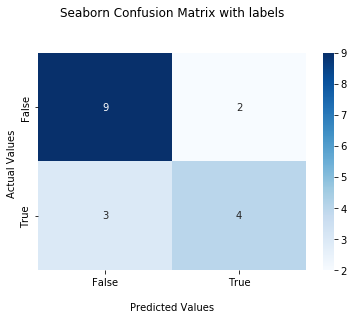

In [15]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [591]:
cm=[[29492,12649], [10847,47012]]
Accuracy :  0.76504
Sensitivity :  0.699841009943
Specificity :  0.812527005306

In [ ]:

plt.clf()
plot_with_rpeaks(signal,peaks)



In [ ]:

plt.clf()
plot_with_rpeaks(signal,peaks)



In [ ]:

plt.clf()
plot_with_rpeaks(ppg_clean,peaks)



In [ ]:
def plot_with_rpeaks(filtered,r_peaks):
    peaks = [filtered[peak] for peak in r_peaks]
    plt.plot(filtered)
    plt.scatter(r_peaks,peaks,c='red')
#    plt.savefig("sinyal_clean_peaks",dpi=1000)
    plt.show()

In [ ]:
ppg_clean = nk.ppg_clean(Dat)
